# BANK MARKETING PROJECT

## Importing Libraries

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Importing all the necessary libraries here.

In [2]:
#Loading the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

All the data are loaded through csv file.

In [3]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

The columns method is used to extract the names of all columns that will help us in dropping specific columns that We do not need such as the categorical columns and therefore would like to drop it. 

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


Here the info function shows us the column names and the data types.

In [7]:
train.shape

(31647, 18)

The shape method gives us the total number of rows to be 18 and total number of columns as 31647.

In [8]:
test.shape

(13564, 17)

The shape method gives us the total number of rows to be 17 and total number of columns as 13564.

## Data Exploration

In [9]:
#Printing the first 5 rows of the train dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [10]:
#Printing the first 5 rows of the test dataset
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [11]:
#checking for missing values in train dataset
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [12]:
#Checking for missing values in test dataset
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

The use of isnull method we just cross verifying to ensure we do not have any missing values in our data.

## Univariate Analysis

### Analysis of 'Subscribed' variable

In [13]:
#Frequency of 'subscribed'
train['subscribed'].value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

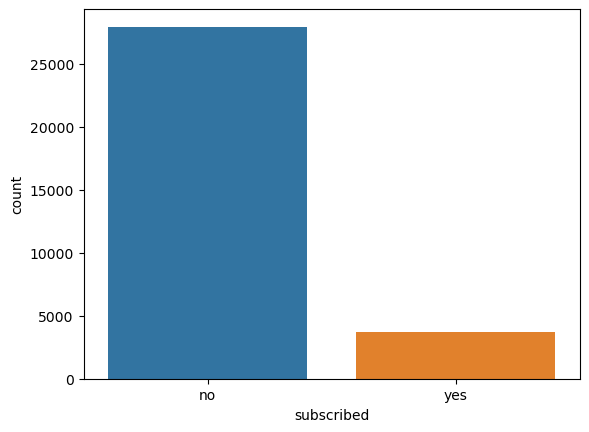

In [14]:
# Plotting the 'subscribed' frequency
sns.countplot(data=train, x='subscribed')

In [15]:
#Normalizing the frequency table of 'Subscribed' variable
train['subscribed'].value_counts(normalize=True)

subscribed
no     0.882611
yes    0.117389
Name: proportion, dtype: float64

From the above analysis we can see that only 3,715 people out of 31,647 have subscribed which is roughly 12%.

### Analysing the 'Job' variable

In [16]:
#Frequency table
train['job'].value_counts()

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64

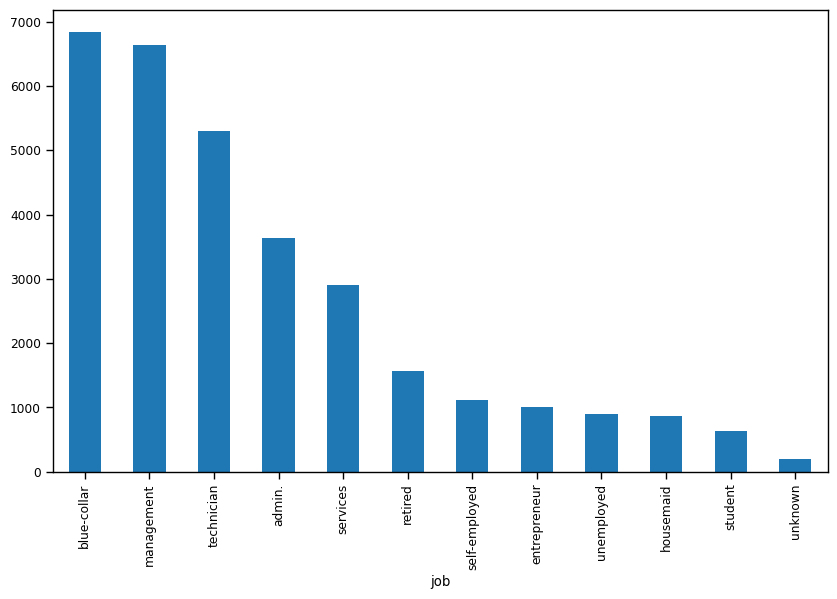

In [17]:
# Plotting the job frequency table
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(10,6));

We can see that most of the clients beloned to blue-collar job and students are least in general as they don't make term deposits in general.

### Analysis of 'marital' status

In [18]:
train['marital'].value_counts()

marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64

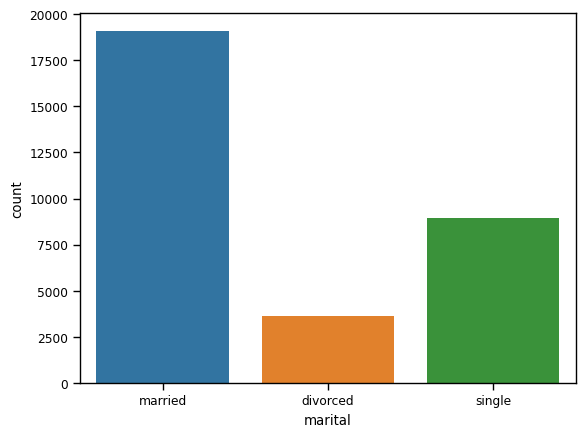

In [19]:
sns.countplot(data=train, x='marital');

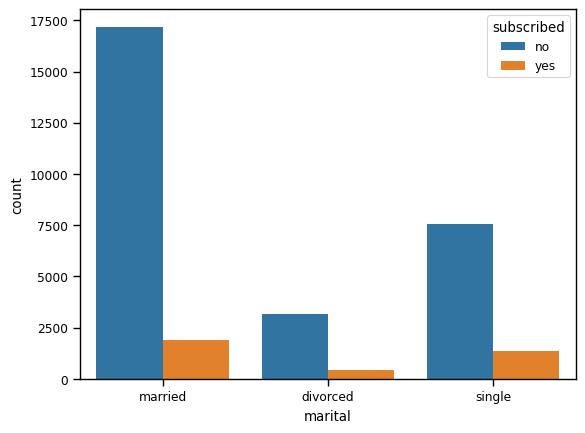

In [20]:
sns.countplot(data=train, x='marital', hue='subscribed');

### Analyzing the 'age' variable

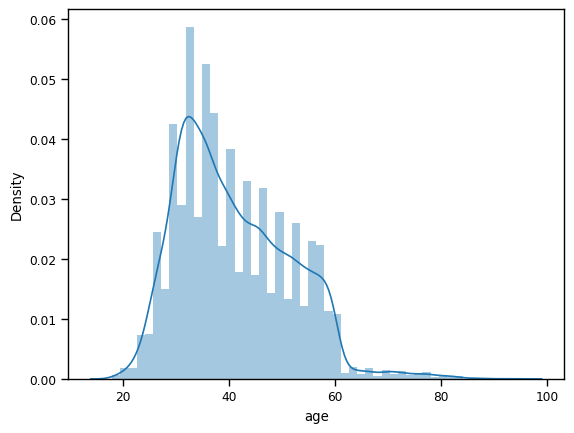

In [21]:
sns.distplot(train['age']);

We can infer that most of the clients fall in the age group between 20-60.

## Bivariate Analysis

In [22]:
#job vs subscribed
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [23]:
job = pd.crosstab(train['job'],train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

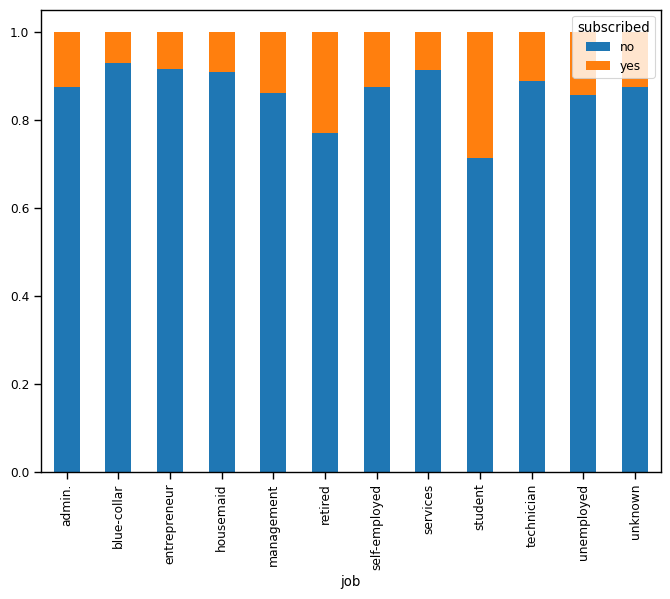

In [24]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

From the above graph we can conclude that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

In [25]:
#Marital status vs subscribed
pd.crosstab(train['marital'], train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [26]:
marital = pd.crosstab(train['marital'], train['subscribed'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

subscribed,no,yes
marital,,
divorced,0.877410,0.122590
married,0.899502,0.100498
single,0.848577,0.151423


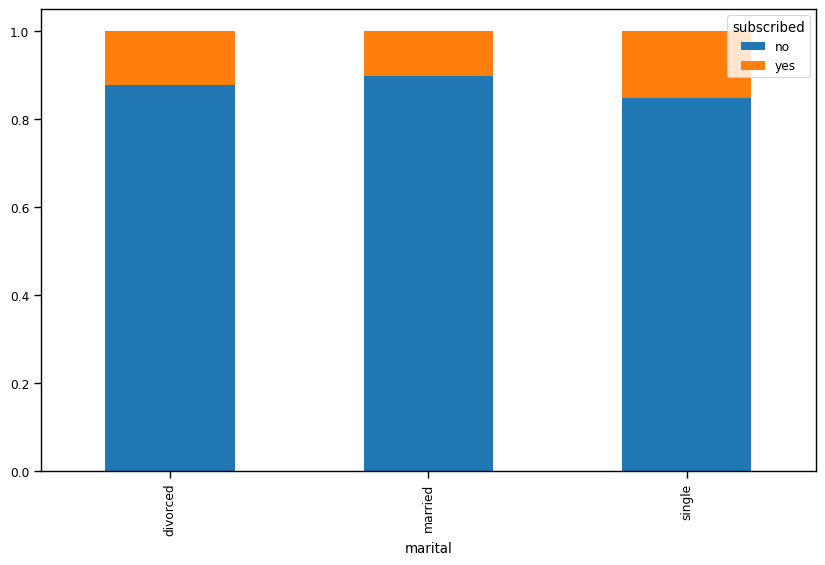

In [27]:
marital_norm.plot.bar(stacked=True, figsize=(10,6));

From the above analysis we can conclude that marital status doesn't have a major impact on the subscription to term deposits.

In [28]:
#default vs subscription
pd.crosstab(train['default'], train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [29]:
dflt = pd.crosstab(train['default'], train['subscribed'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

subscribed,no,yes
default,,
no,0.881720,0.118280
yes,0.929915,0.070085


<Axes: xlabel='default'>

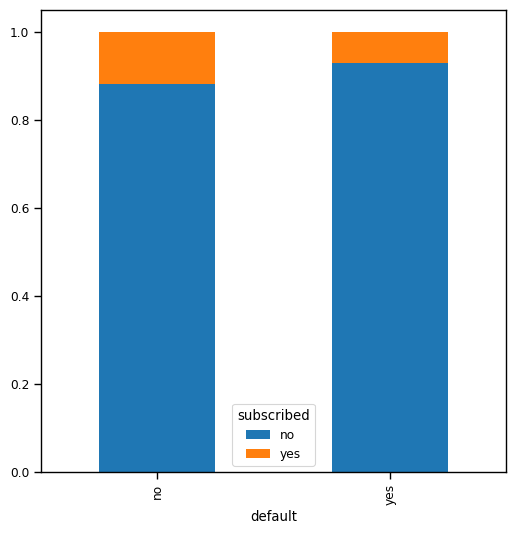

In [30]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

We can conclude that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

In [31]:
# Converting the target variables into 0s and 1s
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [32]:
train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [52]:
#Correlation matrix
train_c =train.corr()
train_c

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.018790,-0.121656,...,-0.208083,0.114475,-0.238047,0.118076,0.178456,0.180922,0.329756,0.209052,0.265963,-0.496277
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,-0.055530,-0.046797,...,0.048587,0.022598,-0.128285,0.036428,0.058387,0.040462,-0.005755,-0.015908,0.029112,-0.000885
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,-0.030051,-0.051048,...,0.035545,0.025238,-0.069464,0.116274,0.040273,0.013423,0.011361,0.009141,0.028584,-0.027209
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.012114,-0.017137,...,-0.196153,-0.024551,-0.020473,0.095541,0.031461,-0.052942,-0.064980,-0.027566,-0.028971,0.079794
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,-0.012764,0.008423,...,-0.016949,-0.008491,0.007397,-0.008458,0.013256,0.015145,-0.016621,-0.002115,0.036574,-0.002768
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.019145,0.011835,...,0.048353,-0.019126,-0.066412,-0.084276,-0.050919,-0.038044,-0.087085,-0.020246,-0.057645,0.107196
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.032793,0.014206,...,-0.114253,0.037521,0.075042,0.012283,0.056424,0.072536,0.698224,0.393408,0.229305,-0.868844
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.016241,-0.017275,...,-0.059557,0.023289,0.002417,0.038587,0.049107,0.061083,0.327826,0.297019,0.189952,-0.504232
job_admin.,0.018790,-0.055530,-0.030051,-0.012114,-0.012764,-0.019145,0.032793,0.016241,1.000000,-0.189074,...,-0.007028,0.008401,0.027257,-0.011660,0.011989,0.004348,0.019712,0.015165,0.016726,-0.031425
job_blue-collar,-0.121656,-0.046797,-0.051048,-0.017137,0.008423,0.011835,0.014206,-0.017275,-0.189074,1.000000,...,0.015663,-0.043016,0.171407,-0.049513,-0.043012,-0.041842,-0.002455,-0.002122,-0.053518,0.028174


<Axes: >

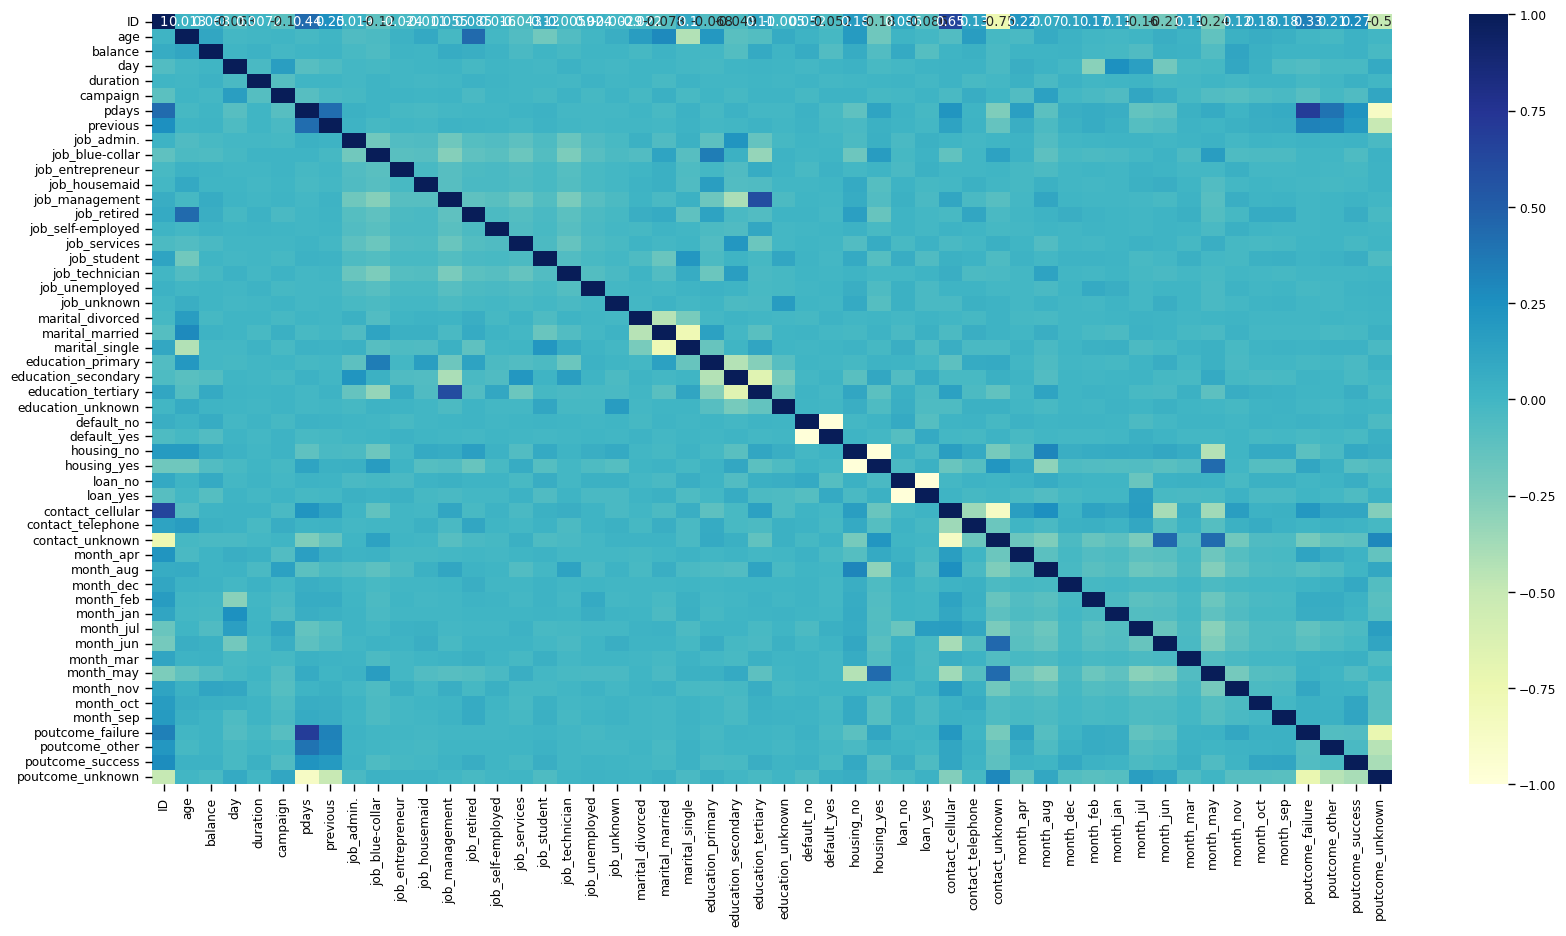

In [53]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(train_c, annot=True, cmap='YlGnBu')

## Model Building

In [35]:
target = train['subscribed']
train = train.drop('subscribed', axis=1)

In [36]:
#generating dummy values on the train dataset
train = pd.get_dummies(train)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,True,False,...,False,False,False,True,False,False,False,False,False,True
1,40576,31,3,20,91,2,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
2,15320,27,891,18,240,1,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,43962,57,3287,22,867,1,84,3,False,False,...,True,False,False,False,False,False,False,False,True,False
4,29842,31,119,4,380,1,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True


Splitting the data into train and validation set such as to validate the results of our model on the validation set, keeping 20% of the dataset as our validation set and the rest as our training set.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)

Now our data is ready and it's time to build our model and check its performance. Since it's a classification problem, We'll be using Logistic Regression model for this problem.

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

#creating an object of logistic regression model
lreg = LogisticRegression()

#fitting the data into the model
lreg.fit(X_train,y_train)

LogisticRegression()

In [40]:
#Making predictions on the validation set
pred = lreg.predict(X_val)

Checking the accuracy of our model

In [41]:
from sklearn.metrics import accuracy_score 

#Calculating the accuracy score
accuracy_score(y_val,pred)

0.8868878357030016

We got an accuracy score of around 89% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity.

Using Decision Tree algorithm for dealing with non-linearity

## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

#creating an object of Decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

#fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [43]:
#making predictions on the validation set
predict = clf.predict(X_val)
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [44]:
#Calculating the accuracy
accuracy_score(y_val,predict)

0.9042654028436019

We got an accuracy of more than 90% on the validation set.

Let's now make the prediction on test dataset

In [45]:
test = pd.get_dummies(test)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,False,False,...,False,False,True,False,False,False,False,False,False,True
1,40403,78,2787,1,372,1,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3709,31,144,16,676,1,-1,0,False,False,...,False,False,True,False,False,False,False,False,False,True
3,37422,57,3777,13,65,2,-1,0,False,False,...,False,False,True,False,False,False,False,False,False,True
4,12527,45,-705,3,111,1,-1,0,False,True,...,False,False,False,False,False,False,False,False,False,True


In [46]:
test_pred = clf.predict(test)
test_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

Finally, we will save these predictions into a csv file.

In [47]:
submissions = pd.DataFrame()

In [48]:
submissions['ID'] = test['ID']
submissions['subscribed'] = test_pred

In [49]:
submissions['subscribed']

0        0
1        1
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int64

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [50]:
submissions['subscribed'].replace(0,'no',inplace=True)
submissions['subscribed'].replace(1,'yes',inplace=True)

In [51]:
submissions['subscribed']

0         no
1        yes
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [55]:
submissions.to_csv('submission file.csv', header=True, index=False)

A csv file has been created in which the ID and Subscribers details are given.